In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pickle

Exploratory Data Analysis (EDA)

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
train_data.head(5)


,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [ ]:
test_data.head(5)


,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [ ]:
train_data.tail()


,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347
15288,15288,25.0,0.50,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.492077,0.446576,35.094733,5867.99722


In [ ]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [ ]:
train_data.describe()


,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [ ]:
test_data.describe()


,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,20385.500000,19.795958,0.391606,0.286307,0.491328,0.593222,82.207014,49.697204,68.687816,59.256465,28.674779,48.592643,18.507360,0.322501,0.501809,0.446345,36.136349
std,2942.898656,6.591864,0.390022,0.059867,0.148166,0.139897,9.153442,5.552286,7.647629,6.617055,3.198282,5.395790,11.780074,0.165342,0.074707,0.037054,4.019885
min,15289.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.233554,0.311921,24.320627
25%,17837.250000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.418867,33.231910
50%,20385.500000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506346,0.446570,36.013557
75%,22933.750000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559325,0.472670,39.127263
max,25482.000000,37.500000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.139425


In [ ]:
train_data.dtypes


id                        int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

In [ ]:
test_data.describe()


,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,20385.500000,19.795958,0.391606,0.286307,0.491328,0.593222,82.207014,49.697204,68.687816,59.256465,28.674779,48.592643,18.507360,0.322501,0.501809,0.446345,36.136349
std,2942.898656,6.591864,0.390022,0.059867,0.148166,0.139897,9.153442,5.552286,7.647629,6.617055,3.198282,5.395790,11.780074,0.165342,0.074707,0.037054,4.019885
min,15289.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.233554,0.311921,24.320627
25%,17837.250000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.418867,33.231910
50%,20385.500000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506346,0.446570,36.013557
75%,22933.750000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559325,0.472670,39.127263
max,25482.000000,37.500000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.139425


In [ ]:
#check for missing values in the DataFrame
train_data.isna().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [ ]:
#check for missing values in the DataFrame
test_data.isna().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64

# Data Visualization

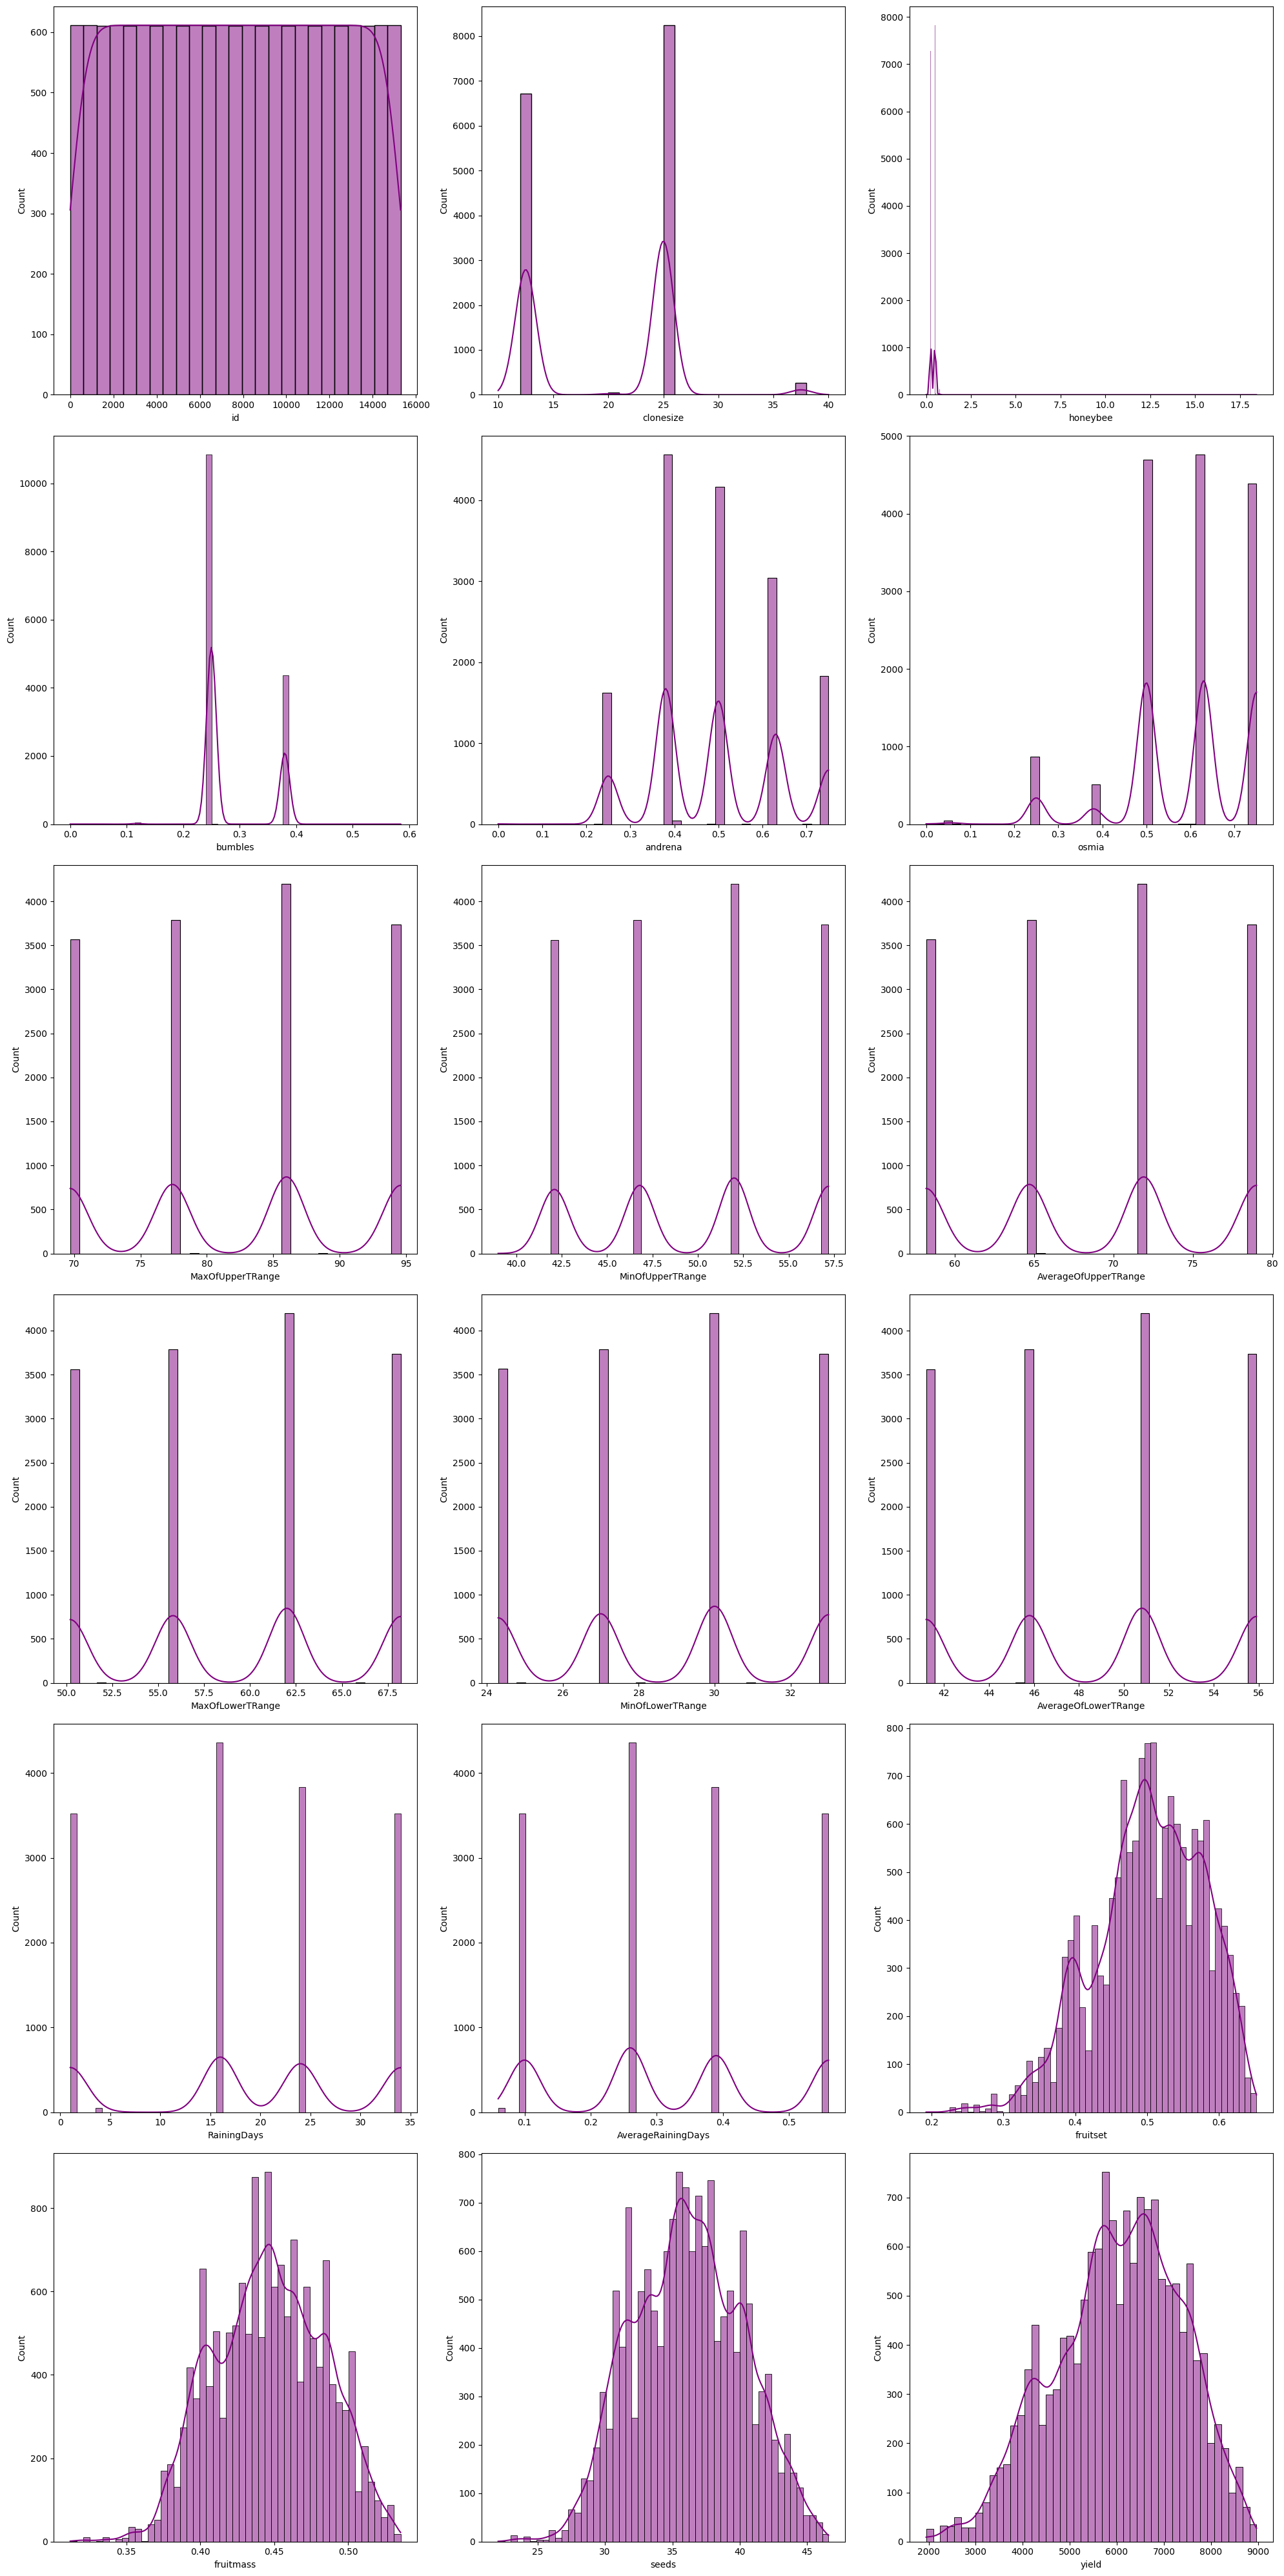

In [ ]:
# subplots grid
fig, axs = plt.subplots(6, 3, figsize=(20, 40))

# Loop through columns and plot histograms
for i, col in enumerate(train_data.columns):
    sns.histplot(data=train_data, x=col, kde=True, color="purple", ax=axs[i // 3, i % 3])

plt.tight_layout()


plt.show()

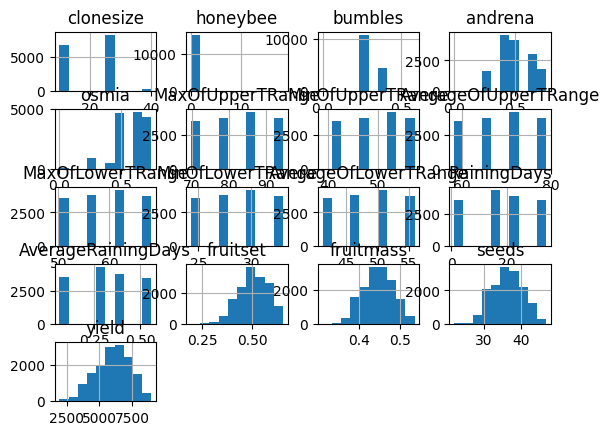

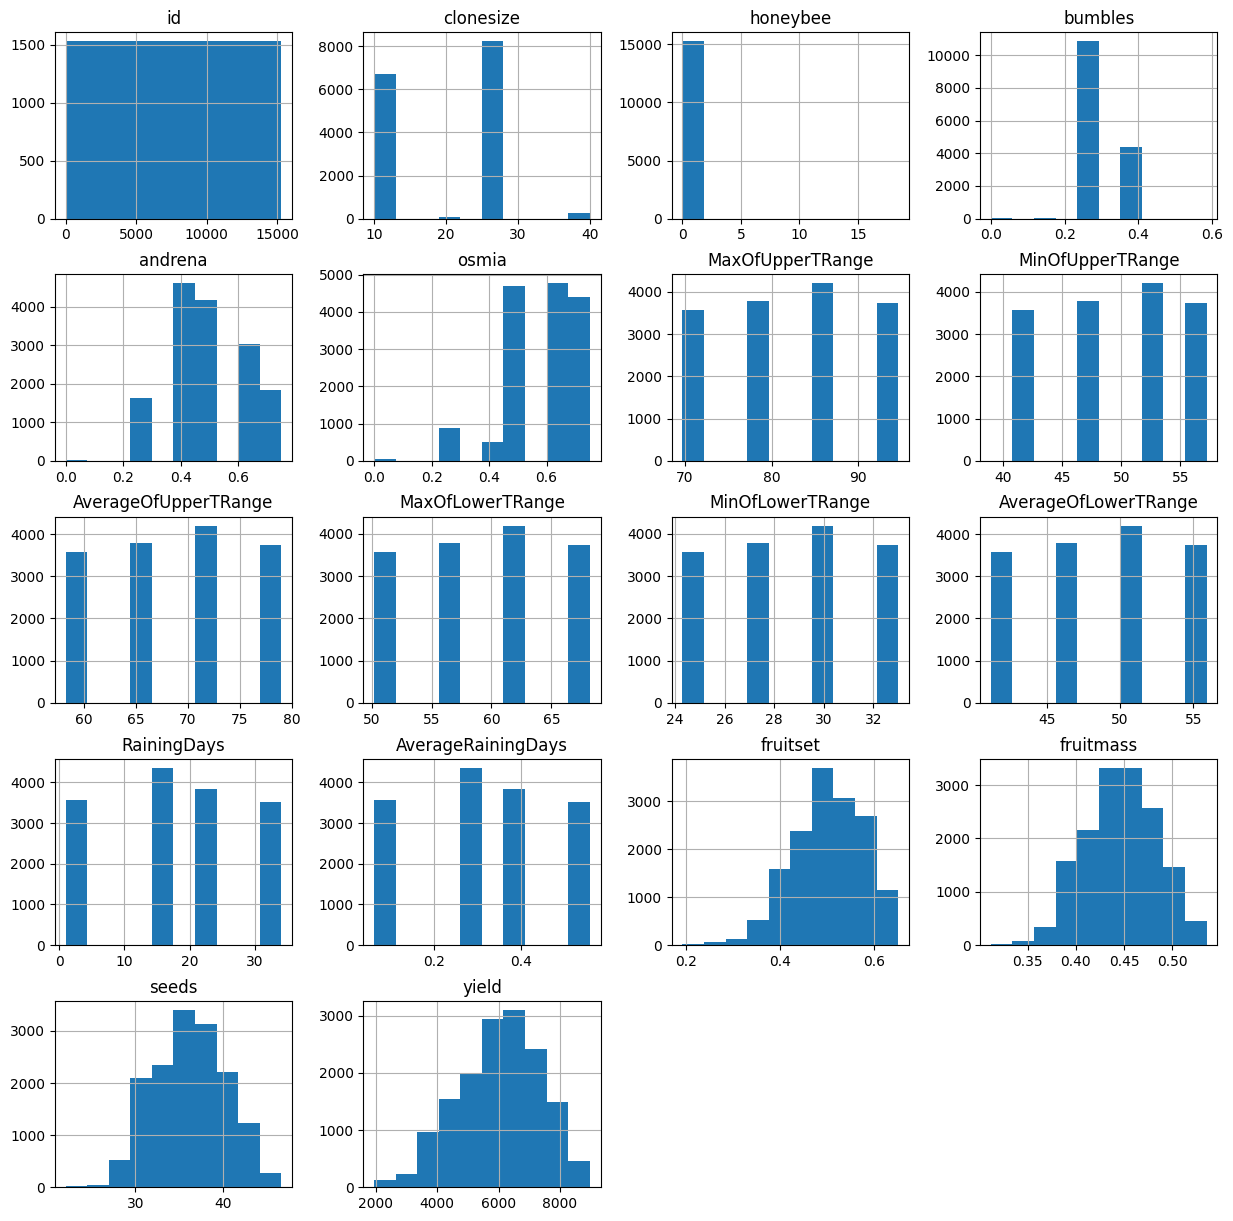

In [ ]:
train_data.drop(['id'], axis=1).hist()
train_data.hist(figsize=(15,15))
plt.show()

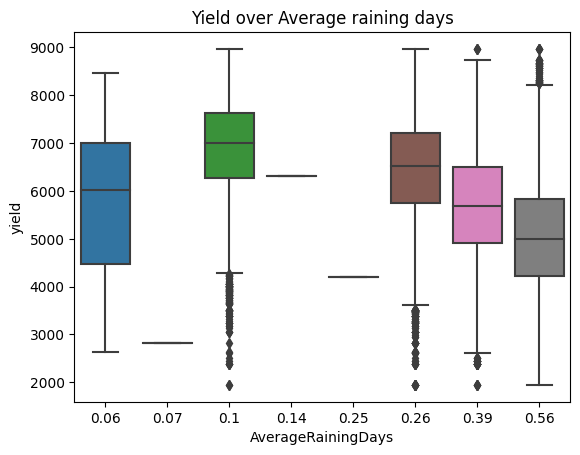

In [ ]:
sns.boxplot(data=train_data,x="AverageRainingDays",y="yield")
plt.title("Yield over Average raining days")
plt.show()

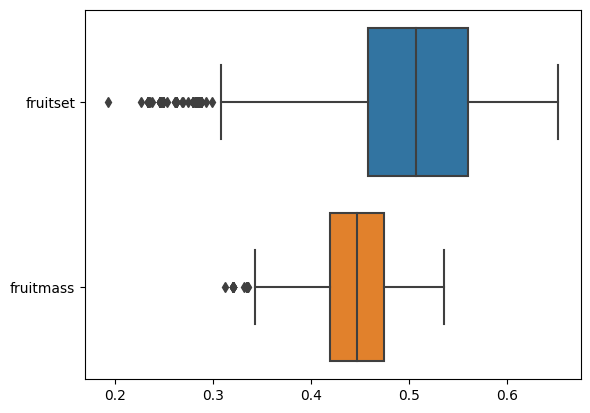

In [ ]:
sns.boxplot(data=train_data[['fruitset', 'fruitmass']], orient='h')
plt.show()

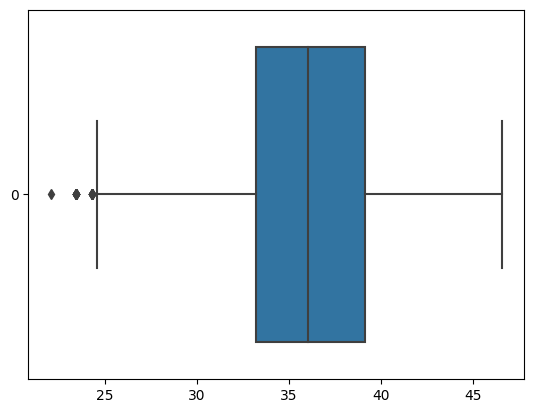

In [ ]:
sns.boxplot(data=train_data['seeds'], orient='h')
plt.show()

In [ ]:
def remove_outliers(df, col):



    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    df = df[df[col] > q1 - 1.5*iqr]
    df = df[df[col] < q3 + 1.5*iqr]

    return df

train = remove_outliers(train_data, 'fruitset')
train = remove_outliers(train_data, 'fruitmass')

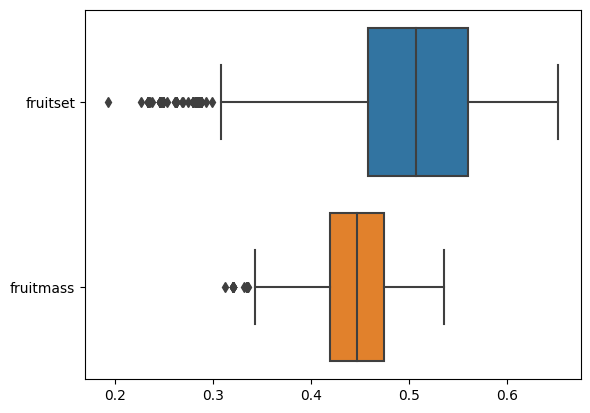

In [ ]:
sns.boxplot(data=train_data[['fruitset', 'fruitmass']], orient='h')
plt.show()

In [ ]:
def remove_outliers(df, col):



    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    df = df[df[col] > q1 - 1.5*iqr]
    df = df[df[col] < q3 + 1.5*iqr]

    return df

train_data = remove_outliers(train_data, 'seeds')

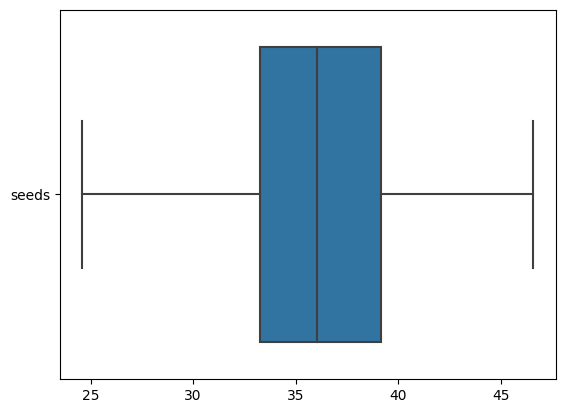

In [ ]:
sns.boxplot(data=train_data[['seeds']], orient='h')
plt.show()

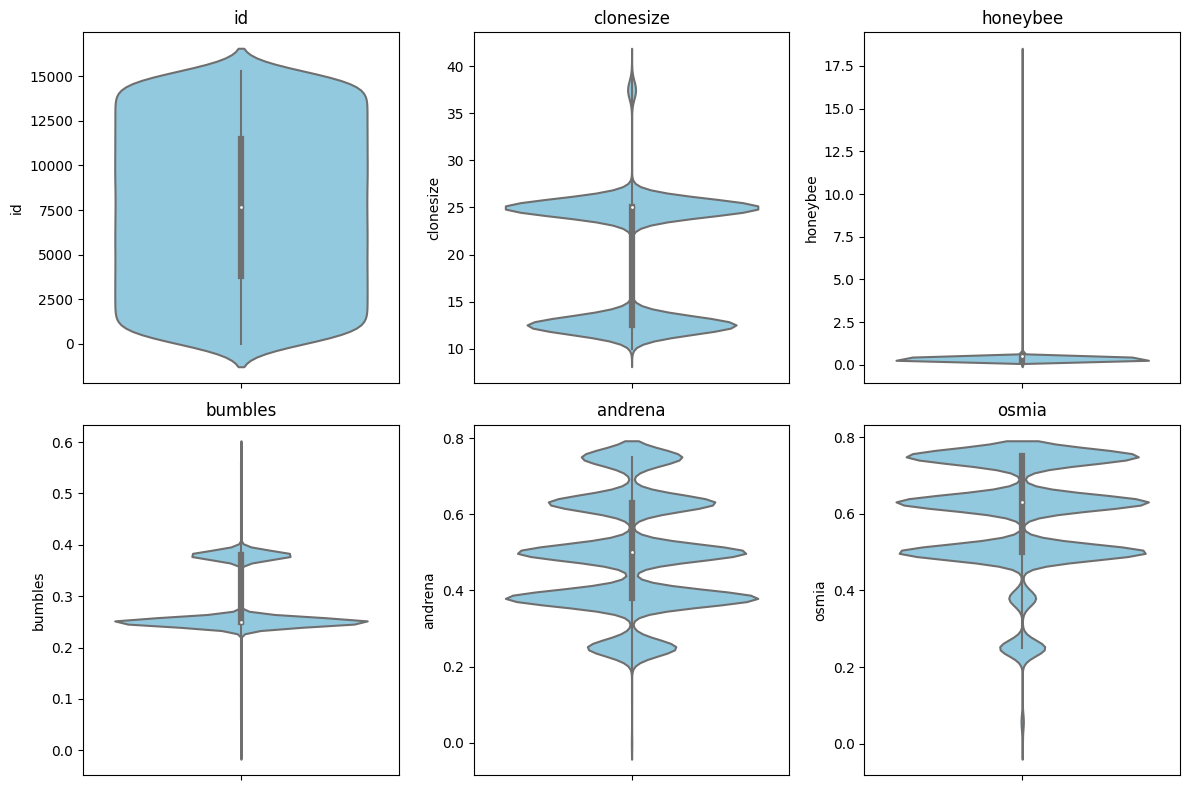

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
axs = axs.flatten()

for i, col in enumerate(train_data.columns[:-1]):
    if i < len(axs):
        sns.violinplot(y=train_data[col], ax=axs[i], color='skyblue')
        axs[i].set_title(col)

for ax in axs[len(train.columns)-1:]:
    ax.remove()

fig.tight_layout()

# Show the plot
plt.show()

# Correlation

In [ ]:
train_data.corr()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,1.000000,0.003597,0.014000,0.003672,0.008992,0.005054,0.008877,0.008963,0.008855,0.009106,0.008893,0.008956,0.002078,0.001400,0.006643,0.005243,0.001326,0.001419
clonesize,0.003597,1.000000,0.304732,0.081421,0.067389,-0.004456,0.015523,0.015202,0.015419,0.015708,0.015390,0.015354,0.164538,0.163471,-0.405356,-0.376022,-0.395567,-0.381021
honeybee,0.014000,0.304732,1.000000,-0.018372,0.030267,-0.011095,0.005930,0.005845,0.005983,0.006033,0.005900,0.005574,0.046470,0.037470,-0.121539,-0.136570,-0.140559,-0.118674
bumbles,0.003672,0.081421,-0.018372,1.000000,-0.166718,0.156114,-0.001031,-0.000740,-0.000695,-0.000540,-0.000730,-0.000574,-0.063460,-0.060479,0.160178,0.162661,0.176041,0.160803
andrena,0.008992,0.067389,0.030267,-0.166718,1.000000,0.306983,-0.012062,-0.011929,-0.011994,-0.011926,-0.012036,-0.012075,-0.025449,-0.026026,0.069518,0.060353,0.059069,0.070597
osmia,0.005054,-0.004456,-0.011095,0.156114,0.306983,1.000000,-0.029586,-0.029014,-0.029611,-0.029596,-0.029682,-0.029538,-0.078203,-0.077039,0.204123,0.186083,0.194823,0.193865
MaxOfUpperTRange,0.008877,0.015523,0.005930,-0.001031,-0.012062,-0.029586,1.000000,0.998597,0.999806,0.999502,0.999828,0.999772,0.010668,0.009657,0.011034,0.150545,0.064745,-0.020003
MinOfUpperTRange,0.008963,0.015202,0.005845,-0.000740,-0.011929,-0.029014,0.998597,1.000000,0.999003,0.998196,0.998952,0.999038,0.011074,0.010074,0.011867,0.151516,0.065598,-0.019414
AverageOfUpperTRange,0.008855,0.015419,0.005983,-0.000695,-0.011994,-0.029611,0.999806,0.999003,1.000000,0.999464,0.999973,0.999974,0.010592,0.009567,0.011959,0.151992,0.065870,-0.019428
MaxOfLowerTRange,0.009106,0.015708,0.006033,-0.000540,-0.011926,-0.029596,0.999502,0.998196,0.999464,1.000000,0.999488,0.999422,0.010649,0.009568,0.011354,0.150975,0.065160,-0.019685


<Axes: >

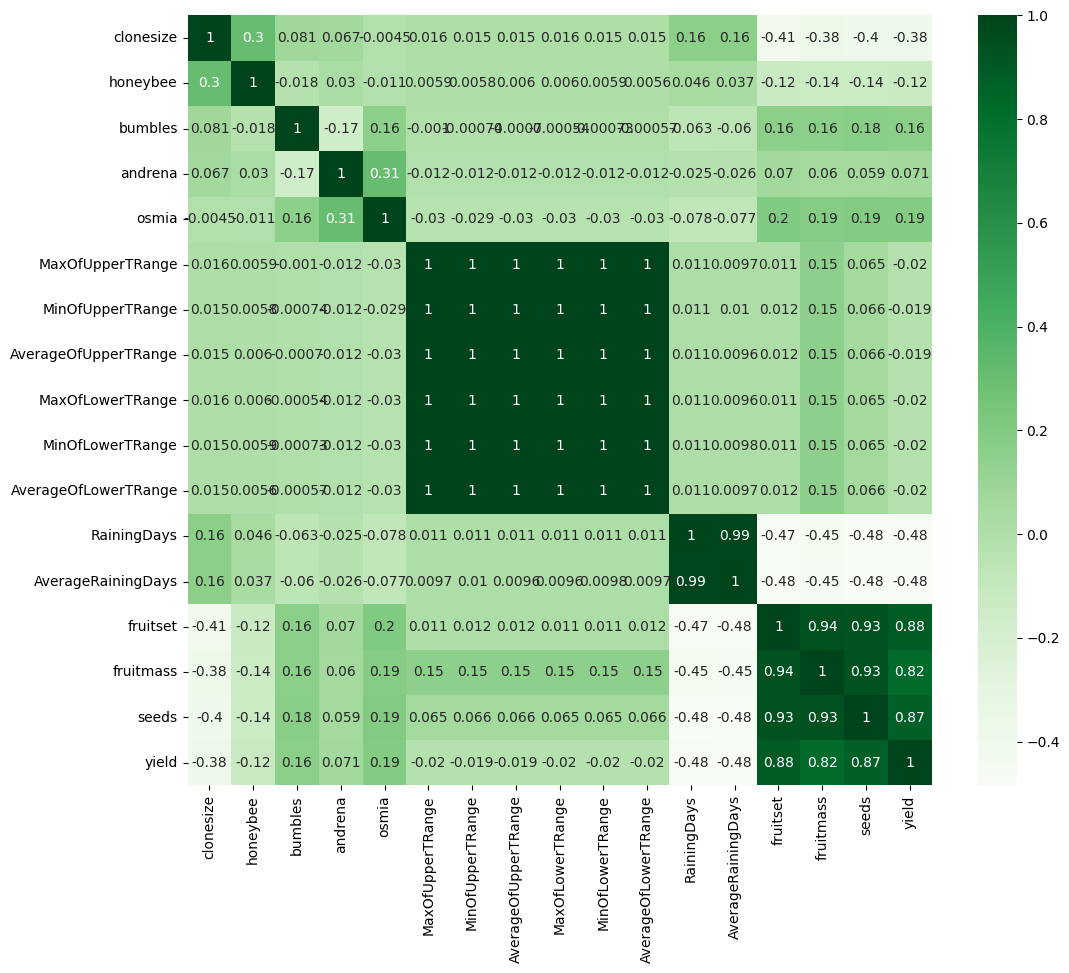

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(train_data.drop(['id'],axis=1).corr(),annot=True,cmap='Greens')

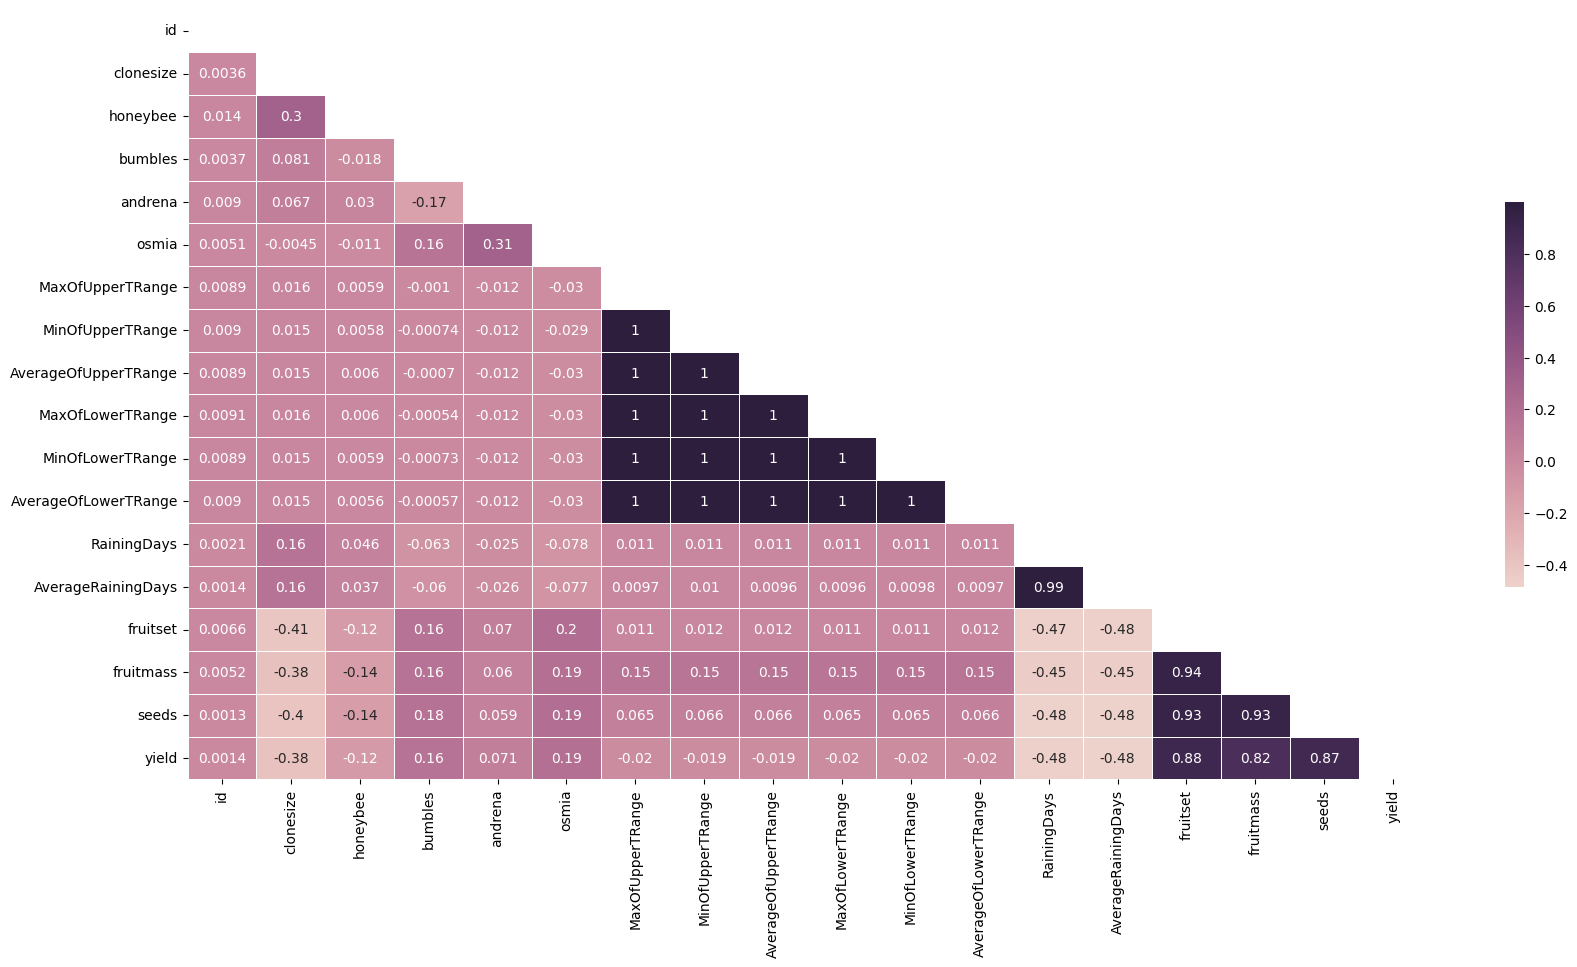

In [ ]:
fig, axes = plt.subplots(figsize=(20, 10))
sns.heatmap(train_data.corr() , cmap = sns.cubehelix_palette(as_cmap=True), mask=np.triu(train.corr()), linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

In [ ]:
train_data.corr()["yield"].sort_values(ascending = False)

yield                   1.000000
fruitset                0.884746
seeds                   0.867928
fruitmass               0.824969
osmia                   0.193865
bumbles                 0.160803
andrena                 0.070597
id                      0.001419
MinOfUpperTRange       -0.019414
AverageOfUpperTRange   -0.019428
AverageOfLowerTRange   -0.019567
MaxOfLowerTRange       -0.019685
MinOfLowerTRange       -0.019806
MaxOfUpperTRange       -0.020003
honeybee               -0.118674
clonesize              -0.381021
RainingDays            -0.476406
AverageRainingDays     -0.482919
Name: yield, dtype: float64

# Data Preprocessing

In [ ]:
train_data.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [ ]:
test_data.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

In [ ]:
X=train_data.drop(["id","yield"],axis=1)
y=train_data["yield"]

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Selection

In [ ]:
# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
catboost_model = CatBoostRegressor(random_state=42, verbose=0)  # Set verbose to 0 to suppress output

In [ ]:
# Fit the models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)

In [ ]:
# Predictions
rf_preds = rf_model.predict(X_val)
xgb_preds = xgb_model.predict(X_val)
catboost_preds = catboost_model.predict(X_val)

In [ ]:
#to calculate mean absolute error MAE
from sklearn.metrics import mean_absolute_error

In [ ]:
rf_mae = mean_absolute_error(y_val, rf_preds)
xgb_mae = mean_absolute_error(y_val, xgb_preds)
catboost_mae = mean_absolute_error(y_val, catboost_preds)

In [ ]:
# Compare MAE values
print("Random Forest MAE:", rf_mae)
print("XGBoost MAE:", xgb_mae)
print("CatBoost MAE:", catboost_mae)

Random Forest MAE: 368.8069269498554
XGBoost MAE: 371.3328489098581
CatBoost MAE: 356.3046963439903


In [ ]:
# Initialize the CatBoostRegressor
catboost_model = CatBoostRegressor(
    n_estimators=288,
    random_seed=294,
    depth=4,
    min_data_in_leaf=4,
    loss_function='MAE'  # Using Mean Absolute Error for optimization
)

In [ ]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(
    loss_function='RMSE',
    depth=4,
    min_data_in_leaf=4,
    random_seed=0
)

# fit the model using  data
catboost_model.fit(X_train, y_train)


Learning rate set to 0.060798
0:	learn: 1268.0287178	total: 7.99ms	remaining: 7.98s
1:	learn: 1211.0758385	total: 13.9ms	remaining: 6.92s
2:	learn: 1158.5834439	total: 21.7ms	remaining: 7.22s
3:	learn: 1109.5929792	total: 28ms	remaining: 6.98s
4:	learn: 1063.6222032	total: 33.9ms	remaining: 6.75s
5:	learn: 1022.0560718	total: 46.4ms	remaining: 7.68s
6:	learn: 982.2124010	total: 52.5ms	remaining: 7.45s
7:	learn: 946.9353174	total: 58.6ms	remaining: 7.27s
8:	learn: 913.1812583	total: 64.8ms	remaining: 7.13s
9:	learn: 882.3023610	total: 71.1ms	remaining: 7.04s
10:	learn: 853.8978131	total: 77.4ms	remaining: 6.96s
11:	learn: 828.1883602	total: 83.3ms	remaining: 6.86s
12:	learn: 804.1461226	total: 89.3ms	remaining: 6.78s
13:	learn: 782.1433025	total: 95.7ms	remaining: 6.74s
14:	learn: 762.1242871	total: 102ms	remaining: 6.68s
15:	learn: 743.2599355	total: 108ms	remaining: 6.66s
16:	learn: 726.7580879	total: 114ms	remaining: 6.61s
17:	learn: 711.3631881	total: 121ms	remaining: 6.59s
18:	lear

In [ ]:
# predictions using the trained CatBoost model
catboost_pred = catboost_model.predict(X_val)


In [ ]:
#  Mean Absolute Error for CatBoost predictions
catboost_mae = mean_absolute_error(y_val, catboost_pred)
print("Mean Absolute Error (MAE) for CatBoost:", catboost_mae)

Mean Absolute Error (MAE) for CatBoost: 360.28491073546775


# Hyper Prameter Tuning

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# CatBoostRegressor model
model = CatBoostRegressor()

# Define the hyperparameter grid for Grid Search
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)


Streaming output truncated to the last 5000 lines.
2:	learn: 882.5470046	total: 7.55ms	remaining: 496ms
3:	learn: 797.6963709	total: 9.93ms	remaining: 487ms
4:	learn: 736.4855832	total: 12.5ms	remaining: 489ms
5:	learn: 689.2686893	total: 15.1ms	remaining: 489ms
6:	learn: 654.7617763	total: 17.7ms	remaining: 489ms
7:	learn: 631.3073899	total: 20.1ms	remaining: 483ms
8:	learn: 615.8128829	total: 22.9ms	remaining: 485ms
9:	learn: 604.4122961	total: 25.5ms	remaining: 485ms
10:	learn: 594.9794988	total: 28.2ms	remaining: 484ms
11:	learn: 589.3951761	total: 30.8ms	remaining: 482ms
12:	learn: 584.9618209	total: 33.3ms	remaining: 479ms
13:	learn: 581.2378407	total: 35.7ms	remaining: 475ms
14:	learn: 579.1505502	total: 38ms	remaining: 468ms
15:	learn: 576.5310934	total: 40.4ms	remaining: 465ms
16:	learn: 574.9392348	total: 43.1ms	remaining: 463ms
17:	learn: 573.5093121	total: 45.5ms	remaining: 460ms
18:	learn: 572.5416809	total: 47.9ms	remaining: 456ms
19:	learn: 571.3654267	total: 50.3ms	rema

# Prediction

In [ ]:
catboost=test_data.drop("id",axis=1).to_numpy()

In [ ]:
catboost_pred=catboost_model.predict(catboost)

In [ ]:
predictions=pd.concat([test_data["id"],pd.DataFrame(catboost_pred,columns=["yield"])],axis=1, join='inner')

In [ ]:
predictions.to_csv("prediction.csv",index=False)

# Software Artifact

In [ ]:
# Train (fit) the model
model = CatBoostRegressor()  # customize hyperparameters
model.fit(X_train, y_train)

Learning rate set to 0.060798
0:	learn: 1268.2146872	total: 13.8ms	remaining: 13.8s
1:	learn: 1212.7744674	total: 25.5ms	remaining: 12.7s
2:	learn: 1161.9114574	total: 31.2ms	remaining: 10.4s
3:	learn: 1113.3470582	total: 34.5ms	remaining: 8.6s
4:	learn: 1068.3314008	total: 38ms	remaining: 7.55s
5:	learn: 1025.2289983	total: 41.5ms	remaining: 6.88s
6:	learn: 988.2744688	total: 44.8ms	remaining: 6.36s
7:	learn: 952.9626113	total: 48.5ms	remaining: 6.01s
8:	learn: 920.7214846	total: 52ms	remaining: 5.73s
9:	learn: 889.5200260	total: 55.5ms	remaining: 5.49s
10:	learn: 861.5637108	total: 59.1ms	remaining: 5.32s
11:	learn: 835.9382555	total: 62.6ms	remaining: 5.15s
12:	learn: 813.4052262	total: 66.1ms	remaining: 5.02s
13:	learn: 791.5256065	total: 69.5ms	remaining: 4.9s
14:	learn: 770.7462496	total: 73ms	remaining: 4.79s
15:	learn: 753.3270955	total: 76.2ms	remaining: 4.69s
16:	learn: 736.3433445	total: 79.7ms	remaining: 4.61s
17:	learn: 720.4846414	total: 83.2ms	remaining: 4.54s
18:	learn:

In [ ]:
# Save the model using pickle
with open('catboost_model.pkl', 'wb') as model_file:
    pickle.dump(model,model_file)

In [ ]:
# Load the saved model
with open('catboost_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [ ]:
# Read the test CSV file
test_data = pd.read_csv("/content/drive/MyDrive/test.csv")
# Drop the 'id' column
test_data = test_data.drop('id', axis=1)

In [ ]:
# columns match the features used in training
test_data = test_data[train_data.columns.difference(['yield', 'id'])]

In [ ]:
# Make predictions on the test data
test_predictions = catboost_model.predict(test_data)

In [ ]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'yield_predictions': test_predictions})

In [ ]:
# Save predictions to a CSV file
predictions_df.to_csv('wildbluberrypredictioncount.csv', index=False)

In [ ]:
predictions_df.head()

,yield_predictions
0,7544.371813
1,7737.465206
2,7750.323835
3,7796.866982
4,7853.889650


In [ ]:
# Define the columns for user input
columns = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange',
           'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange',
           'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']

In [ ]:
 # Get user input
user_input = []
for column in columns:
    value = float(input(f"Enter {column}: "))
    user_input.append(value)

Enter clonesize: 1
Enter honeybee: 2
Enter bumbles: 3
Enter andrena: 1
Enter osmia: 1
Enter MaxOfUpperTRange: 1
Enter MinOfUpperTRange: 1
Enter AverageOfUpperTRange: 1
Enter MaxOfLowerTRange: 1
Enter MinOfLowerTRange: 1
Enter AverageOfLowerTRange: 1
Enter RainingDays: 1
Enter AverageRainingDays: 1
Enter fruitset: 1
Enter fruitmass: 1
Enter seeds: 1


In [ ]:
# Convert user input to a DataFrame
user_input_df = pd.DataFrame([user_input], columns=columns)

In [ ]:
# Make predictions on the user input
user_predictions = catboost_model.predict(user_input_df)

In [ ]:
# Display the predicted yield for the user input
print("Predicted Yield:", user_predictions[0])

Predicted Yield: 7300.536652367859
